# **Introdução a Visão Computacional**

# **Preparando o Ambiente**

**Primeiro vamos importar as bibliotecas que precisaremos para "brincar" um pouco com imagens.**

In [96]:
# A boa e velha Numpy
import numpy as np

# A OpenCV = Open Source Computer Vision 
# Para saber mais acesso o about: https://opencv.org/about/
import cv2
print("Versão do OpenCV : %s " % cv2.__version__)

# E a matplotlib só para comparar as coisas
%matplotlib inline
from matplotlib import pyplot as plt

def plotImage(image):
  plt.figure(figsize =(4,4))
  plt.imshow(image)
  plt.axis('off') 
  plt.show()

Versão do OpenCV : 4.7.0 


In [97]:
# O Trecho a seguir é necessário para usarmos o OpenCV para mostrar uma imagem.
# O método original do OpenCV causa um bug no Google Colabs que força tudo a ir 
# pro Limbo, por isso precisamos desse "Ajuste Técnico Improvisado"
from google.colab.patches import cv2_imshow

**Agora que estamos com as bibliotecas carregadas, vamos importar e mostrar algumas imanges**

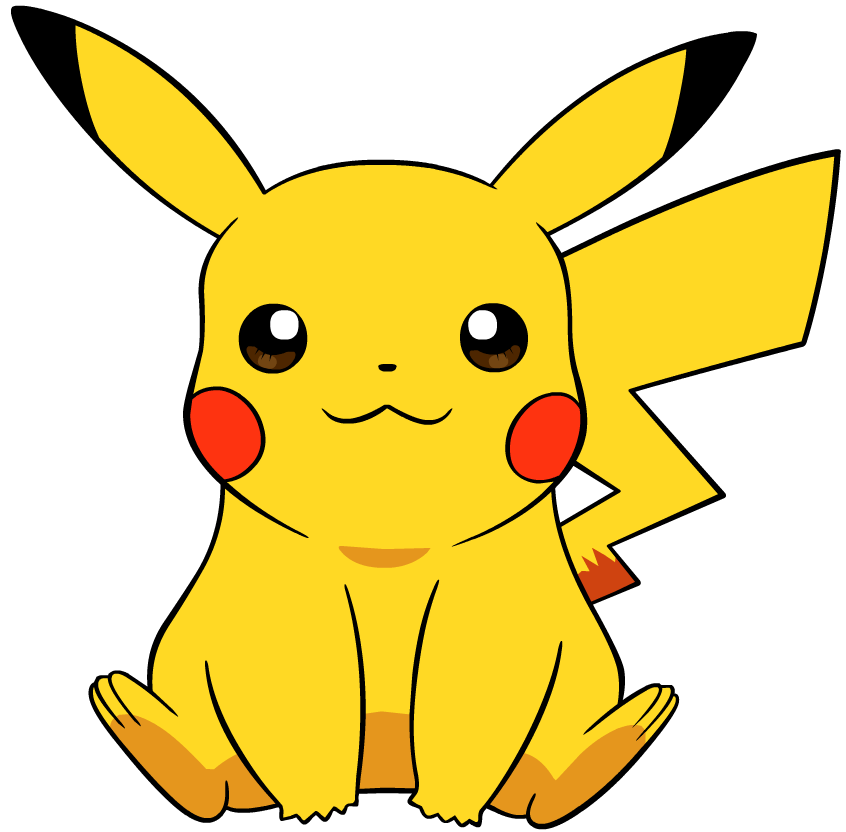

In [98]:
# Carregando a imagem
pikachu = cv2.imread("/content/pikachu.png")

# Mostrando a imagem
cv2_imshow(pikachu)

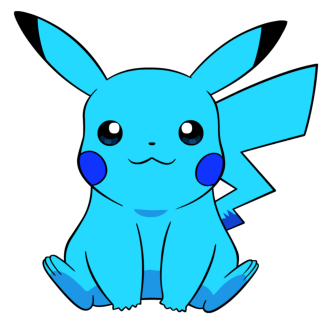

In [99]:
# E com o PLT?

plotImage(pikachu)

# **Alguns Conceitos em CV**

A imagem colorida possui três dimensões: as linhas e as colunas da matriz, bem como os canais da imagem. Uma imagem colorida geralmente possui três canais: R (Red - vermelho) G (Green - verde) B (Blue - azul)

Mas porque a imagem é mostrada de modo estranho pelo pacote matplotlib? Porque a OpenCV representa os canais da imagem na ordem B - G - R, e não R - G - B como é esperado pela maior parte das bibliotecas.

Assim, para podermos visualizar corretamente uma imagem do OpenCV com matplotlib, precisamos inverter os canais, como no código abaixo:

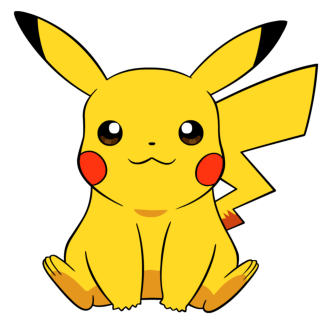

In [100]:
pikachuRGB = cv2.cvtColor(pikachu, cv2.COLOR_BGR2RGB)
plotImage(pikachuRGB)

In [101]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: ", pikachuRGB.shape)
print("Quantidade de linhas: ", pikachuRGB.shape[0])
print("Quantidade de colunas: ", pikachuRGB.shape[1])
print("Camadas de cores: ", pikachuRGB.shape[2])

Dimensões da imagem:  (832, 846, 3)
Quantidade de linhas:  832
Quantidade de colunas:  846
Camadas de cores:  3


In [102]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: \n", pikachuRGB)

Dimensões da imagem: 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


A matriz acima é a representação da imagem de forma numérica, é o valor de cada pixel da imagem. Com esta imagem fica complicado. Vamos tentar analisar separando os canais de cores de um pixel específico.

In [103]:
(b, g, r) = pikachuRGB[450, 250]
print('O pixel (450, 250) tem as seguintes cores:')
print('Vermelho:',r, 'Verde:', g, 'Azul:', b)

O pixel (450, 250) tem as seguintes cores:
Vermelho: 16 Verde: 51 Azul: 254


**# Segmentação de Pixel**

### **Filtro Negativo**

Vamos fazer um filtro negativo, ou seja, em uma imagem binária realizamos a troca de 0 pra 1 e de 1 para 0 para cada pixel da imagem

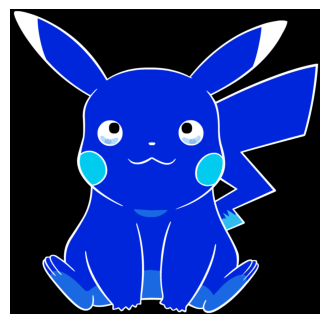

In [137]:
pikachuNegativoColorido = cv2.bitwise_not(pikachuRGB)
#cv2_imshow(pikachuNegativo)
plt.figure(figsize =(4,4))
plt.imshow(pikachuNegativoColorido)
plt.axis('off') 
plt.show()

### **Recorte da imagem (crop)**

O recorte de uma parte da imagem, ou crop, consiste em extrair da imagem uma região de interresse (ROI).

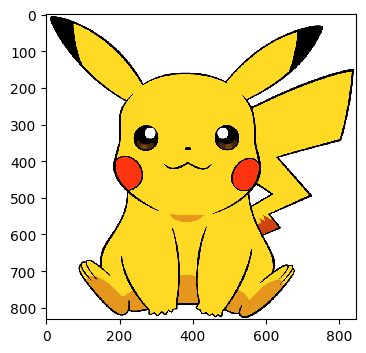

In [105]:
plt.figure(figsize =(4,4))
plt.imshow(pikachuRGB, interpolation="none")
plt.show()

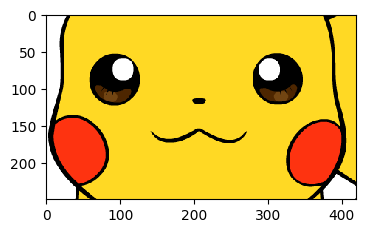

In [106]:
# Vamos fazer uma copia da imagem... para nao estragar a original
pikachuRGBCopy = pikachuRGB.copy()

#crop_img = img[y:y+h, x:x+w]
pikachuRGBCopy = pikachuRGB[250:500,180:600]
plt.figure(figsize =(4,4))
plt.imshow(pikachuRGBCopy, interpolation="none", cmap="gray")
plt.show()

### **Seguimentação de imagens**

Agora que sabemos como manipular pixel e como alterar seu valor e sua posição. Podemos fazer atividades mais complexas como conseguir reaalizar a seguimentação de algum objeto ou item da imagem (video), Como na imagem abaixo

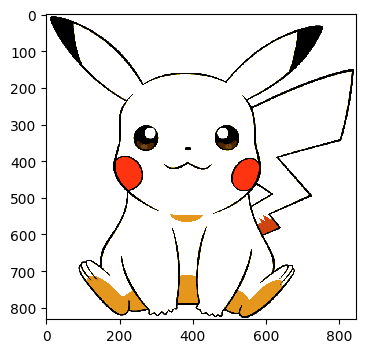

In [109]:
pikachuRGBCopy = pikachuRGB.copy()

for y in range(0, pikachuRGBCopy.shape[0]):
  for x in range(0, pikachuRGBCopy.shape[1]):
    if pikachuRGBCopy[y,x,1] > 170 :
      pikachuRGBCopy[y,x]= (255,255,255)
    
plt.figure(figsize =(4,4))
plt.imshow(pikachuRGBCopy, interpolation="none")
plt.show()

# **Conhecendo Alguns Filtros**

**Filtros** são ferramentas utilizadas para processar imagens digitais com objetivo de melhorar sua qualidade, remover ruídos, realçar características ou extrair informações especificas, como bordas. Esses filtros funcionam aplicando uma transformação matemática na imagem, modificando suas propriedades.

## **Filtros de Convolução**

O **filtro de convolução** é um nomes dados para filtragem no domínio espacial. Esse processo ocorre com a aplicação de filtros (pequenas matrizes), posicionados sob cada pixel da imagem. Estes filtros, normalmente, são chamados de kernels (ou núcleos). O resultado final do valor do pixel é calculado através de um produto de convolução.

Normalmente os kernels são matrizes 3x3, 5x5 ou 7x7.

Embora o nome convolução seja muito usado, na prática realizamos o processo de correlação, para realizar a convolução é necessário realizar a inversão da mascara (matriz), o que não é um problema pois em processamento de imagem, tipicamente os kernels são simétricos, logo os resultados de convolução e correlação não mudam.**negrito**

### **FILTROS PARA BLURRING**

O filtro de blurring (borramento) consiste na perda gradual de foco da imagem, produzindo a sensação que ela está borrada. Em outras palavras são filtros passa-baixa.

Existem diversos métodos para construções de kernels para blurring:

* filtro da média (box filter): blur = cv.blur(img,(5,5))
* filtro gaussiano: blur = cv.GaussianBlur(img,(5,5),0)
* filtro da mediana: blur = cv.medianBlur(img,5)
* filtro bilateral: blur = cv.bilateralFilter(img,9,75,75

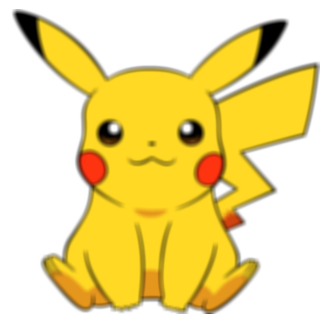

In [138]:
# filtro da média (box filter): blur = cv.blur(img,(15,15))
pikachuBlur = cv2.blur(pikachuRGB,(15,15))
#cv2_imshow(pikachuBlur)
plotImage(pikachuBlur)

# Aplique os outros filtros e veja os resultados

### **FILTRO DE SHARPENING**

O filtro de sharpening consiste no ganho gradual de foco de uma imagem, produzindo a sensação que ela está cada vez mais bem definida. É uma aproximação da inversa do filtro de blurring.

Existem diversos métodos para construções de kernels para blurring:

* filtro Sobel X: imgf = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
* filtro Sobel Y: imgf = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
* filtro Laplaciano: imgf = cv.Laplacian(img,cv.CV_64F)

Abaixo, temos as formas matriciais do filtro de sharpening.

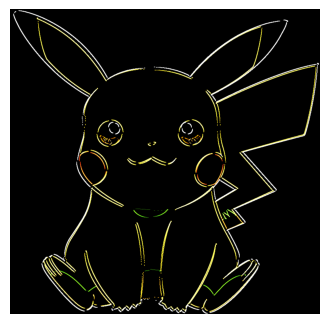

In [139]:
# Agora vamos tentar pegar só as bordas da imagem
pikachuBordas = cv2.Sobel(pikachuRGB, cv2.CV_8U, 1, 1, ksize = 5)
#cv2_imshow(pikachuBordas)
plotImage(pikachuBordas)

**Legal né? Acho até que vou fazer uma tattoo nesse estilo... brincadeira...**

**Essa imagem é legal, mas tem muitas nuances de cores ai... e se agente quiser somente uma linha dos contornos em preto e branco?**

**Para isso, precisamos usar uma imagem em escala de cinza**

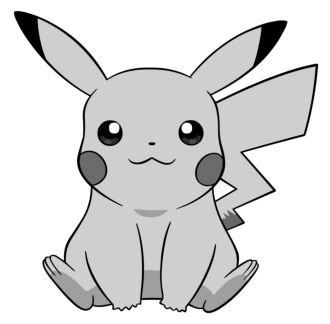

In [140]:
pikachuCinza = cv2.imread("/content/pikachu.png", cv2.IMREAD_GRAYSCALE)
pikachuRGBCinza = cv2.cvtColor(pikachuCinza, cv2.COLOR_BGR2RGB)
#cv2_imshow(pikachuCinza)
plotImage(pikachuRGBCinza)

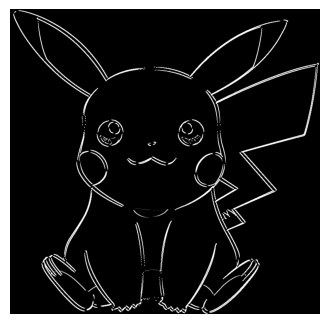

In [141]:
# Agora vamos tentar de novo pegar o contorno do desenho
pikachuBordas = cv2.Sobel(pikachuRGBCinza, cv2.CV_8U, 1, 1, ksize = 5)
#cv2_imshow(pikachuBordas)
plotImage(pikachuBordas)

Altere os parametros da funçao para ter novos resultados!

### **FILTRO DE BORDAS DE CANNY**

O filtro de canny é um detector de linhas e bordas que combina de forma mais sofisticada operações lineares.

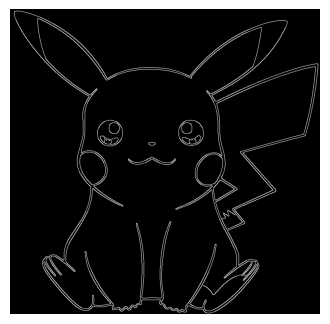

In [142]:
min_contrast = 50
max_contrast = 200

imgfb = cv2.GaussianBlur(pikachuRGBCinza,(5,5),0)
imgf  = cv2.Canny(imgfb, min_contrast, max_contrast )
plt.figure(figsize =(4,4))
plt.imshow(imgf,cmap="Greys_r", vmin=0, vmax=255)
plt.axis('off') 
plt.show()

### **FILTRO DE LIMIARIZAÇÃO**


O filtro de limiariazação é converte uma imagem em tons de ciza para uma imagem binaria.

Podemos utilizar diversas tecnicas de limiarização, cada um com sua particularidade, leia a documentação para mais detalhes: [Documentação](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

**parametros da funcao threshold:**

* pikachuCinza = Imagen a ser tratada. Tem que ser em escala de cinza;

* 200 = Limite -> Pixels abaixo desse valor vao assumir valor 0;

* 255 = Valor Maximo -> Pixels que excederem o Limite vão assumir esse valor;

* cv2.THRESH_BINARY -> Como a imagem vai ser tratada


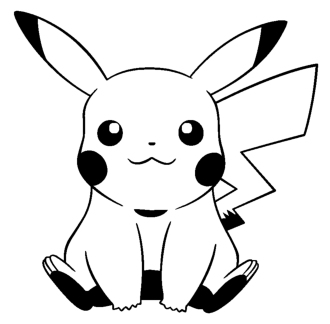

In [143]:
# Agora vamos aplicar um contraste por limiarização
_,pikachuLimiar = cv2.threshold(pikachuRGBCinza, 200, 255, cv2.THRESH_BINARY)

#cv2_imshow(pikachuLimiar)
plotImage(pikachuLimiar)

# **Espaço de Cor e Contornos**

## **Espaço de cor HSV**


Até o momento trabalhamos com imagens em escala de cinza, BGR, RGB e binaria. Agora vamos conhecer e trabalhar com HSV ou HSB.

**H - hue (matriz)**: descreve o pigmento de uma cor e é medido em graus de 0 a 359 graus.

**S - saturation (saturação)**: descreve a vivacidade ou o esmaecimento de uma cor e é medida em porcentagem de 0 a 100 (0 = cor "diluida" 100 = cor pura).

**V - value (Value) ou B - brightness (brilho)**: determina a intensidade percebida (0 = preto 100 = brilho maximo);

**lembrete super importante!! a OpenCV trabalha com valores de 8bits (0-255), ou seja o valor da matriz tem que ser divido por 2**

**Conversão para HSV**

Na OpenCV a conversão de BGR para RGB é muito simples, podemos converter diretamete da imagem em BGR usando o **cv2.COLOR_BGR2HSV**

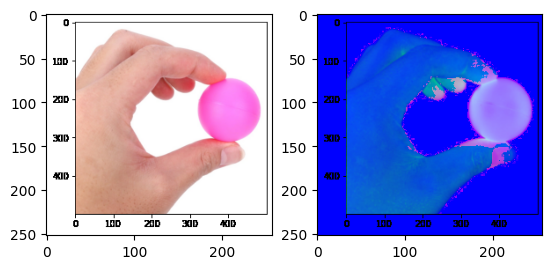

In [160]:
img = cv2.imread("/content/bolinha.png")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_hsv)
plt.show()

**mascara de cor**

Para realizar uma marcara de cor, nos usamos a função cv2.inrange para escolher o intervalo de cor ( o valor minimo e o valor maximo).

No caso específico para detectarmos a bolinha, estamos  definindo a faixa de valores de matiz (H), saturação (S) e valor (V) que correspondem à cor magenta em um espaço de cor HSV (Hue, Saturation, Value).

O valor de matiz varia de 0 a 179 no espaço de cor HSV do OpenCV. Por isso, estamos definindo que o valor mínimo de H é 140 (cor correspondente a vermelho-alaranjado) e o valor máximo é 170 (cor correspondente a vermelho-rosado).

O valor mínimo de S é 50, o que significa que estamos descartando pixels com uma baixa saturação (ou seja, tons de cinza ou branco), e o valor máximo é 255, o que significa que estamos incluindo pixels com alta saturação (ou seja, cores vivas).

O valor mínimo de V é 100, o que significa que estamos descartando pixels muito escuros, e o valor máximo é 255, o que significa que estamos incluindo pixels com intensidade máxima (ou seja, brilhantes).

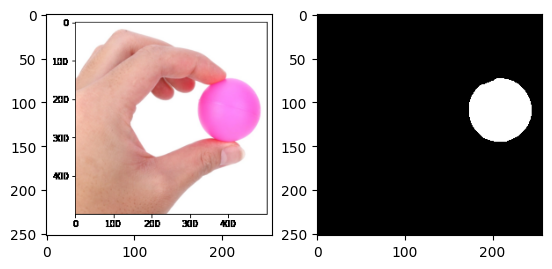

In [162]:
# Definição dos valores minimo e max da mascara
# Define os valores mínimos e máximos de HSV para a cor vermelha
image_lower_hsv = np.array([140, 50, 100])  
image_upper_hsv = np.array([170, 255, 255])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

## **Detecção de contornos**

Para realizar a detecção dos contornos, ou bordas de um objeto, usamos a função cv2.findontours

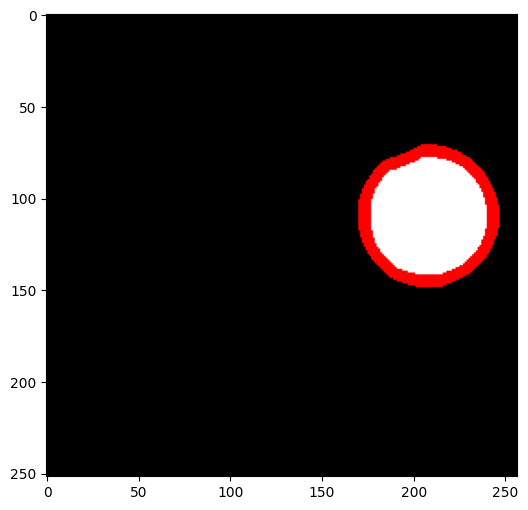

In [163]:
# realizando o contorno da imagem
contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# para desenhar o contorno primeiro faz uma copia da imagem 
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 

# Cópia da máscara para ser desenhada "por cima"
contornos_img = mask_rgb.copy() 

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

## **Centro de Massa**

O calculo para o centro de massa é feito atráves da função cv2.findontours

In [164]:
# usando o exemplo da documentação https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
# notamos que a função devolve um dicionario. 
cnt = contornos[0]
M = cv2.moments(cnt)
print( M )

{'m00': 3920.0, 'm10': 814515.3333333333, 'm01': 430656.0, 'm20': 170466926.3333333, 'm11': 89468521.25, 'm02': 48536525.33333333, 'm30': 35928675413.6, 'm21': 18721312889.5, 'm12': 10081855262.7, 'm03': 5601324318.0, 'mu20': 1223245.6611110866, 'mu11': -15130.635714292526, 'mu02': 1224129.839455776, 'mu30': -56734.236907958984, 'mu21': -104548.61817756295, 'mu12': 40999.27820703387, 'mu03': 73406.20578193665, 'nu20': 0.07960522055335581, 'nu11': -0.0009846571555011277, 'nu02': 0.07966276027278843, 'nu30': -5.8969853696457294e-05, 'nu21': -0.0001086683641854496, 'nu12': 4.2614857787749084e-05, 'nu03': 7.629878273317501e-05}


In [165]:
# Calculo das coordenadas do centro de massa
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("centro de massa na possição: ",cx, cy)

centro de massa na possição:  207 109


Vamos plotar isso na imagem para saber se esta correto. A função "cv2.line" vai nos ajudar a desenhar uma cruz. e função "cv2.putText" a escrever na imagem as coordenadas.

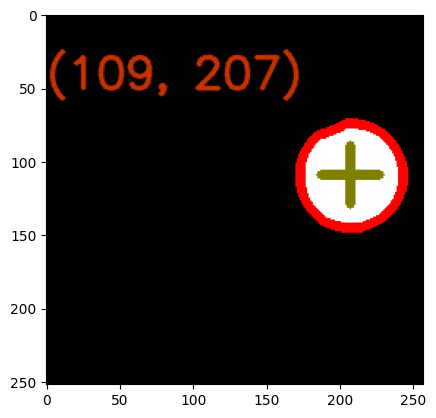

In [166]:
## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (0,50)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img);